# Exploración real del dataset

✅ Dataset raw cargado desde: ../data/raw/industrial_timeseries.csv
   Shape: (17520, 10)
   Columnas: ['timestamp', 'value', 'temperature', 'demand_factor', 'operational_efficiency', 'energy_price', 'hour', 'day_of_week', 'month', 'is_weekend']
   Rango temporal: 2022-01-01 00:00:00 a 2023-12-31 23:00:00
🔍 ANÁLISIS EXPLORATORIO AUTOMÁTICO

📊 ESTADÍSTICAS DESCRIPTIVAS:


,value,temperature,demand_factor,operational_efficiency,energy_price,hour,day_of_week,month,is_weekend
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,1455.718175,20.008519,0.640309,0.849675,80.032670,11.500000,3.006849,6.526027,0.287671
std,111.869895,12.190447,0.251397,0.087478,13.786543,6.922384,2.001757,3.447950,0.452690
min,973.890000,-10.160000,0.000000,0.645900,30.000000,0.000000,0.000000,1.000000,0.000000
25%,1377.480000,10.517500,0.449975,0.776300,69.900000,5.750000,1.000000,4.000000,0.000000
50%,1458.090000,20.040000,0.651200,0.849950,80.030000,11.500000,3.000000,7.000000,0.000000
75%,1537.102500,29.440000,0.851700,0.923700,90.160000,17.250000,5.000000,10.000000,1.000000
max,1758.400000,47.860000,1.000000,1.000000,137.740000,23.000000,6.000000,12.000000,1.000000



🔢 TIPOS DE COLUMNAS DETECTADOS:
   Numéricas: 9 - ['value', 'temperature', 'demand_factor', 'operational_efficiency', 'energy_price', 'hour', 'day_of_week', 'month', 'is_weekend']
   Categóricas: 0 - []
   Fechas: 1 - ['timestamp']

📈 DISTRIBUCIONES DE VARIABLES NUMÉRICAS:


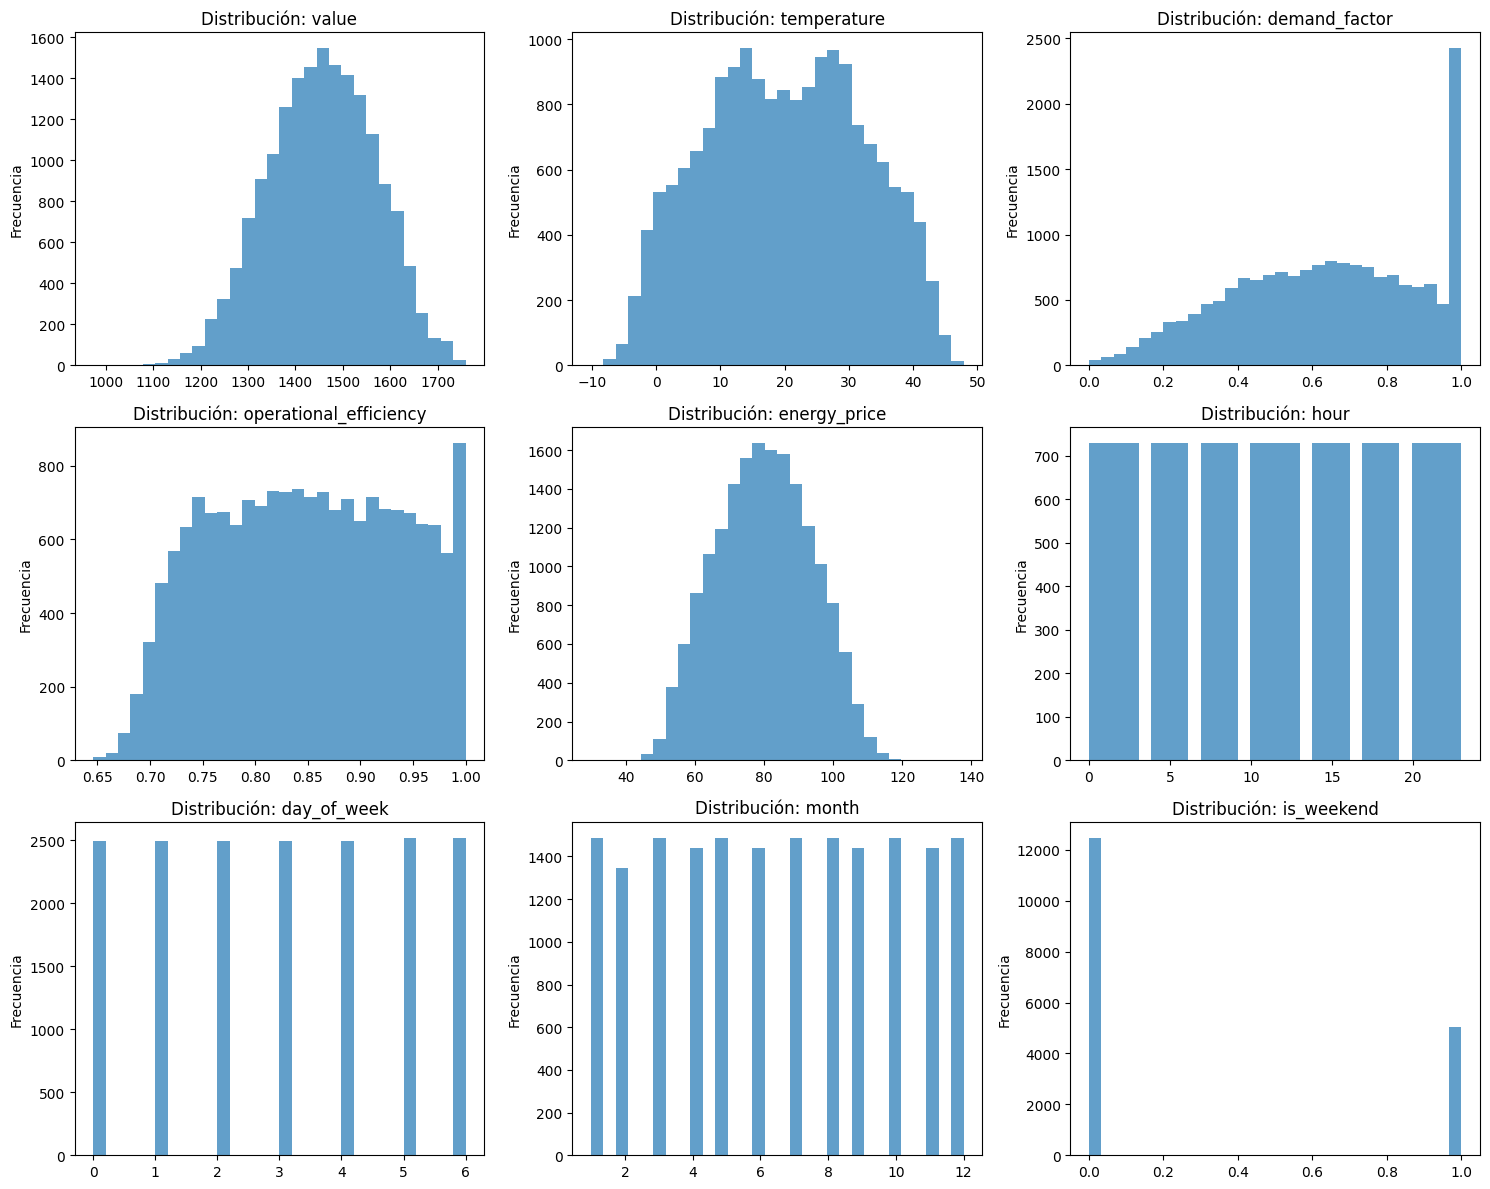


📅 SERIE TEMPORAL DEL TARGET (value):


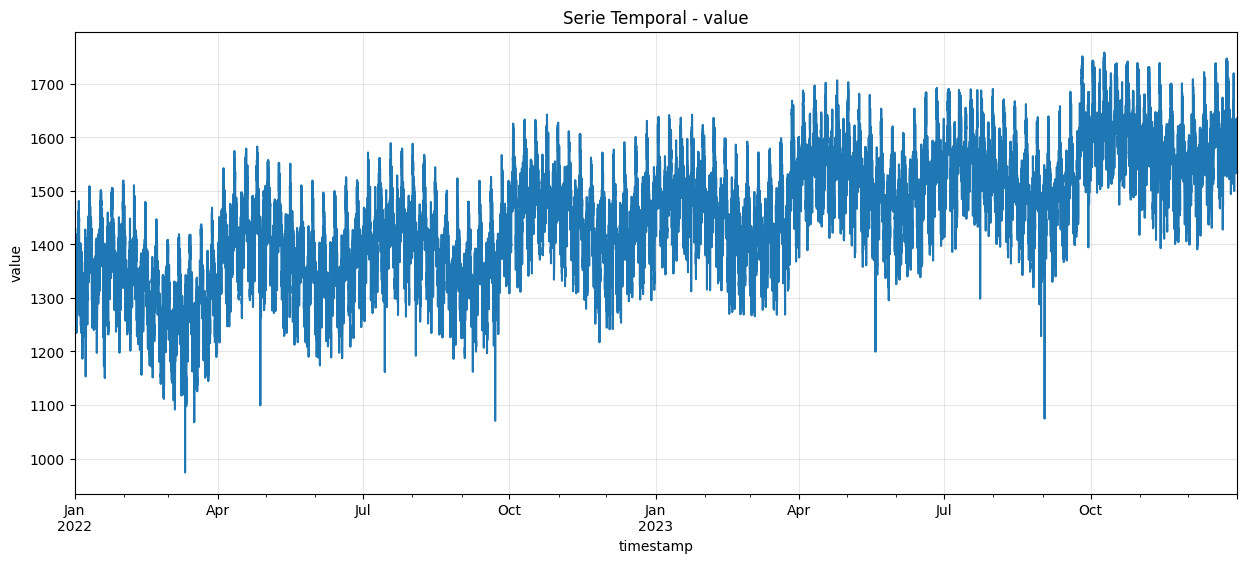


🔗 MATRIZ DE CORRELACIÓN:


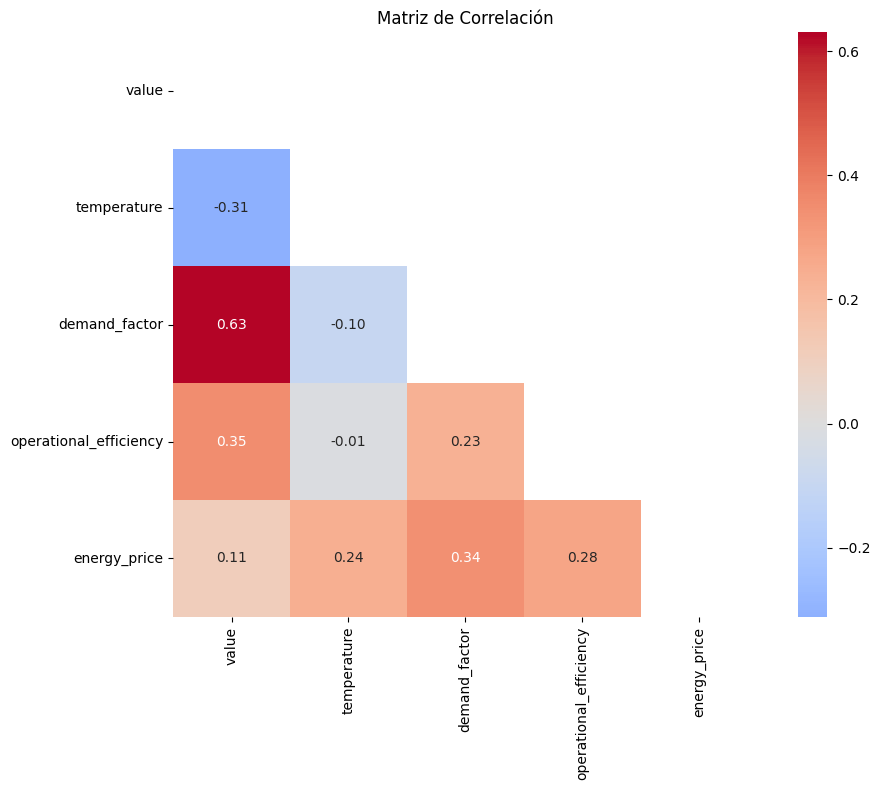


🎯 CORRELACIONES CON value:
   demand_factor: 0.630
   operational_efficiency: 0.354
   temperature: -0.311
   energy_price: 0.111

⏰ PATRONES TEMPORALES:


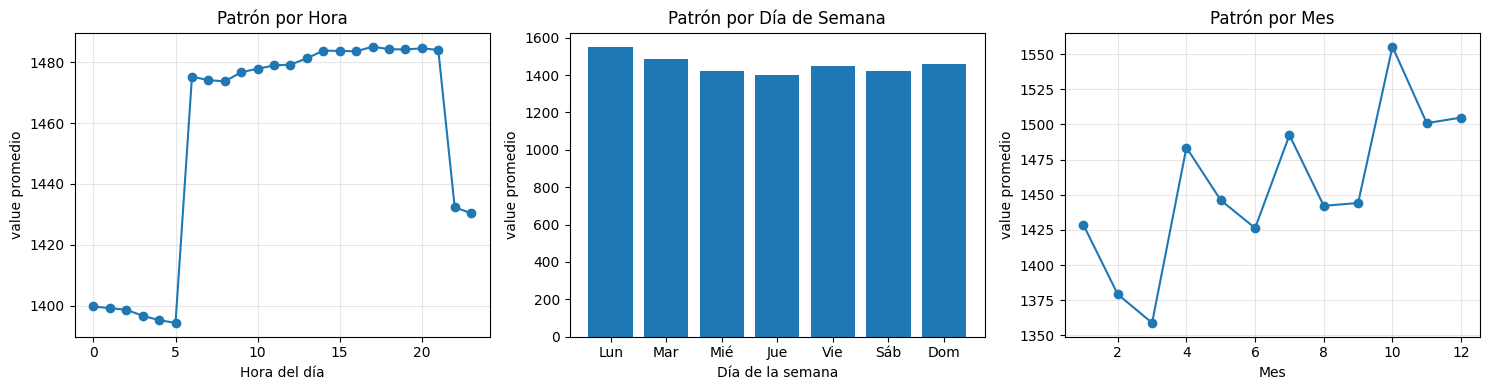


🚨 DETECCIÓN DE OUTLIERS (método IQR):
   value: 22 outliers (0.1%)
   temperature: 0 outliers (0.0%)
   demand_factor: 0 outliers (0.0%)
   operational_efficiency: 0 outliers (0.0%)
   energy_price: 5 outliers (0.0%)

✅ ANÁLISIS EXPLORATORIO COMPLETADO
   Dataset: (17520, 10)
   Features numéricas: 4
   Ready para feature engineering!


In [1]:
# Análisis Exploratorio - Genérico

## Objetivo:
### ✔ EDA completamente automático
### ✔ Detectar patrones genéricos
### ✔ Visualizaciones automáticas

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from data_loader import load_raw, get_feature_target_columns
from config_loader import load_config

# Cargar datos y configuración
config = load_config()
df = load_raw()
feature_cols, target_col = get_feature_target_columns()
datetime_col = config['dataset']['datetime_col']

print("🔍 ANÁLISIS EXPLORATORIO AUTOMÁTICO")
print("=" * 50)

# Estadísticas descriptivas automáticas
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numeric_cols].describe())

# Detección automática de tipos de columnas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n🔢 TIPOS DE COLUMNAS DETECTADOS:")
print(f"   Numéricas: {len(numeric_cols)} - {numeric_cols}")
print(f"   Categóricas: {len(categorical_cols)} - {categorical_cols}")  
print(f"   Fechas: {len(datetime_cols)} - {datetime_cols}")

# Visualización automática de distribuciones
n_numeric = len(numeric_cols)
if n_numeric > 0:
    print(f"\n📈 DISTRIBUCIONES DE VARIABLES NUMÉRICAS:")
    
    # Calcular grid size
    n_cols = min(3, n_numeric)
    n_rows = (n_numeric + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_numeric == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = [axes] if n_numeric == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7)
            axes[i].set_title(f'Distribución: {col}')
            axes[i].set_ylabel('Frecuencia')
    
    # Ocultar ejes sobrantes
    for i in range(n_numeric, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Serie temporal del target
print(f"\n📅 SERIE TEMPORAL DEL TARGET ({target_col}):")
plt.figure(figsize=(15, 6))
df.set_index(datetime_col)[target_col].plot()
plt.title(f'Serie Temporal - {target_col}')
plt.ylabel(target_col)
plt.grid(True, alpha=0.3)
plt.show()

# Matriz de correlación automática
correlation_cols = [col for col in numeric_cols if col in feature_cols + [target_col]]
if len(correlation_cols) > 1:
    print(f"\n🔗 MATRIZ DE CORRELACIÓN:")
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[correlation_cols].corr()
    
    # Crear máscara para el triángulo superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True)
    plt.title('Matriz de Correlación')
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más altas con el target
    target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    print(f"\n🎯 CORRELACIONES CON {target_col}:")
    for col, corr in target_correlations.head(5).items():
        print(f"   {col}: {corr:.3f}")

# Análisis temporal automático
if datetime_col in df.columns:
    print(f"\n⏰ PATRONES TEMPORALES:")
    
    # Crear features temporales para análisis
    df_temp = df.copy()
    df_temp['hour'] = df_temp[datetime_col].dt.hour
    df_temp['day_of_week'] = df_temp[datetime_col].dt.dayofweek
    df_temp['month'] = df_temp[datetime_col].dt.month
    
    # Patrones por hora, día, mes
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Por hora
    hourly_avg = df_temp.groupby('hour')[target_col].mean()
    axes[0].plot(hourly_avg.index, hourly_avg.values, marker='o')
    axes[0].set_title('Patrón por Hora')
    axes[0].set_xlabel('Hora del día')
    axes[0].set_ylabel(f'{target_col} promedio')
    axes[0].grid(True, alpha=0.3)
    
    # Por día de semana
    daily_avg = df_temp.groupby('day_of_week')[target_col].mean()
    day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
    axes[1].bar(range(7), daily_avg.values)
    axes[1].set_title('Patrón por Día de Semana')
    axes[1].set_xlabel('Día de la semana')
    axes[1].set_ylabel(f'{target_col} promedio')
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(day_names)
    
    # Por mes
    monthly_avg = df_temp.groupby('month')[target_col].mean()
    axes[2].plot(monthly_avg.index, monthly_avg.values, marker='o')
    axes[2].set_title('Patrón por Mes')
    axes[2].set_xlabel('Mes')
    axes[2].set_ylabel(f'{target_col} promedio')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Detección automática de outliers
print(f"\n🚨 DETECCIÓN DE OUTLIERS (método IQR):")
for col in numeric_cols:
    if col in feature_cols + [target_col]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        print(f"   {col}: {len(outliers)} outliers ({outlier_percentage:.1f}%)")

print(f"\n✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print(f"   Dataset: {df.shape}")
print(f"   Features numéricas: {len([c for c in numeric_cols if c in feature_cols])}")
print(f"   Ready para feature engineering!")